# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy
import statistics
import collections
import math
import random

#import seaborn as sns
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df['temperature'].head()

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
Name: temperature, dtype: float64

In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [4]:
print ('Size: ',  len(df))
print ('Avg Temp : ', np.average(df.temperature))
print ('Standard Deviation: ', np.std(df.temperature))
print ('Standard Error of the Mean: ', np.std(df.temperature) / (len(df)**.5))

Size:  130
Avg Temp :  98.2492307692
Standard Deviation:  0.7303577789050377
Standard Error of the Mean:  0.06405661469519336


## 1. Check for normal distribution

#### Lets first look at PDF on temperature data

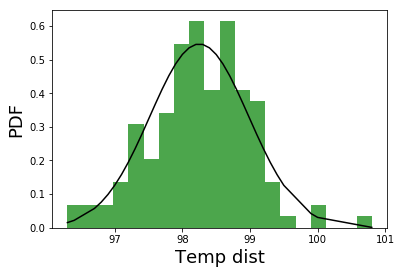

In [5]:
sigma = np.std(df.temperature)
mean = np.average(df.temperature)
temps = sorted(df.temperature)
fit = stats.norm.pdf(temps, mean, sigma)
plt.plot(temps, fit,color='black',)
plt.hist(temps, 20, normed=True, facecolor='green', alpha=0.7)
plt.xlabel('Temp dist', fontsize=18)
plt.ylabel('PDF', fontsize=18)
plt.show()

NOW, Lets test for a normal distribution based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.

In [6]:
# k = z-score returned by skewtest and k is the z-score returned by kurtosistest.p= p-value
# we use p value to test if the variable is normal or not

k,p=stats.mstats.normaltest(df['temperature']) 

if p<0.05:
  print ('Temperature Distribution is not normal')
else:
  print ('Temperature Distribution is normal')

Temperature Distribution is normal


Another test is the Kolmogorov-Smirnov test can be applied for testing normalization

In [7]:
ks_results = scipy.stats.kstest(temps, cdf='norm')
print(ks_results)
if p<0.05:
  print ('Temperature Distribution is not normal')
else:
  print ('Temperature Distribution is again normal')

KstestResult(statistic=1.0, pvalue=0.0)
Temperature Distribution is again normal


## 2. Is the sample size large? Are the observations independent?
A condition for Central Limit Theorem is that the sample size is large and observations are independent. 

CLT says that with a large sample size, sample mean will start to look like population mean. Sampling distribution of mean will be Gaussian distribution (http://bugra.github.io/work/notes/2014-06-26/law-of-large-numbers-central-limit-theorem/)

## 3. Is the true population mean really 98.6 degrees F?

Null Hypothesis: The true temperature mean is 98.6 F

Alternative Hypothesis: The true population mean is is different than 98.6 F

Since our population is large >30, Z-statistics is more suitable. T-statistics is best applied when the sample size is low. However, when T-test is used in large samples, it becomes very similar to the Z-test.

This situation requires One-sample T-test since two-sample T-test Investigates whether the means of two independent data samples differ from one another.

### One-Sample T-Test
A one-sample t-test checks whether a sample mean differs from the population mean.

In [8]:
print ('t-statistic = %6.3f p-value = %6.4f' % stats.ttest_1samp(df['temperature'], np.average(df['temperature'])))   # All data mean

t-statistic =  0.000 p-value = 1.0000


p-value being 1.0 indicates that it is most likely that these results would be observed under the null hypothesis. We should not reject the Null Hypothesis. The actual population mean is 98.6 F

In [9]:
z = (98.6-mean)/(np.std(df.temperature) / (len(df)**.5))
print(z)

5.47592520208


In [10]:
p = (1 - stats.norm.cdf(z)) * 2
print(p)

4.35231517493e-08


If I calculate p-value from z-score, I get a very low value. This is contrary to One-sample T-test I have done before. The actual population mean is NOT 98.6 F.

## 4. At what temperature should we consider someone's temperature to be "abnormal"?

abnormal or anomaly is when the temperature is not within 95% of the population.

In [11]:
R = stats.norm.interval(0.95, loc=mean, scale=sigma)
print ('the abnormal temperature is outside of this interval : ', R)

the abnormal temperature is outside of this interval :  (96.817755826748211, 99.680705711713287)


## 5. Is there a significant difference between males and females in normal temperature?

In [12]:
male = df[df['gender'] == 'M']
female = df[df['gender'] == 'F']

In [13]:
print ('Male Sample Size: ',  len(male))
print ('Male Avg Temp : ', np.average(male.temperature))
print ('Male Temp Standard Deviation: ', np.std(male.temperature))

Male Sample Size:  65
Male Avg Temp :  98.1046153846
Male Temp Standard Deviation:  0.6933598841828696


In [14]:
print ('Female Sample Size: ',  len(male))
print ('Female Avg Temp : ', np.average(female.temperature))
print ('Female Temp Standard Deviation: ', np.std(female.temperature))

Female Sample Size:  65
Female Avg Temp :  98.3938461538
Female Temp Standard Deviation:  0.7377464486428966


In [15]:
mtemps = sorted(male.temperature)
ftemps = sorted(female.temperature)

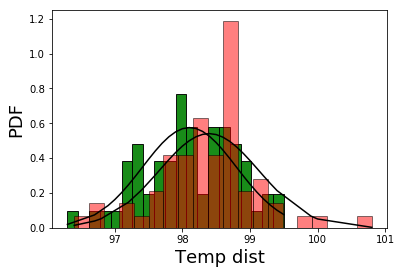

In [16]:
sigmaMale = np.std(male.temperature)
meanMale = np.average(male.temperature)
sigmaFemale = np.std(female.temperature)
meanFemale = np.average(female.temperature)
fit1 = stats.norm.pdf(mtemps, meanMale, sigmaMale)
fit2 = stats.norm.pdf(ftemps, meanFemale, sigmaFemale)
plt.plot(mtemps, fit1,color='black')
plt.hist(mtemps, 20, normed=True, facecolor='green', alpha=0.9, edgecolor = "black")

plt.plot(ftemps, fit2,color='black')
plt.hist(ftemps, 20, normed=True, facecolor='red', alpha=0.5, edgecolor = "black")

plt.xlabel('Temp dist', fontsize=18)
plt.ylabel('PDF', fontsize=18)

plt.show()

The above graph is not a good way to distinguish 2 populations. 

We should perform two sampled T-test for independent samples because 

In [17]:
print ('t-statistic = %6.3f p-value = %6.4f' % stats.ttest_ind(male['temperature'], female['temperature'], axis=0))

t-statistic = -2.285 p-value = 0.0239


Since p is less than .05, the null hypothesis is rejected. There is indeed a difference in the body temperature population means for men and women.

## Conclusion

We ended up with the following conclusions:
- The distribution of body temperatures are normal.
- The sample size is large enough to satisfy CLT.
- I found 2 results for the population mean using two different methods. When I used the 1-sample t-test from scipy library, p-value is 1. When I used analytical equations, p was found to be less than 0.05. 
- The abnormal temperature values outside of 95% CI was found.
- There a significant difference between males and females in normal temperature using 2-sample T-test.